Hola **Carlos**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Siempre intenta incluir un título que sea descriptivo a lo que harás en tu proyecto y una breve introducción al mismo
</div>

In [1]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de datos y la importación de las librerías necesarias!
</div>

# Step 2. Data preparation and enhancement

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
new_name_columns = []

for column in data.columns:
    name_lower_case = column.lower()
    new_name_columns.append(name_lower_case)
data.columns = new_name_columns

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Cambiar los nombres para que sean más accesibles ayuda con la agilidad al momento de hacer algún tratamiento de tus datos
</div>

In [6]:
data.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+
9369,Top Spin 3,DS,2008.0,Action,0.11,0.02,0.00,0.01,65.0,tbd,E
5875,Quake II,N64,1999.0,Shooter,0.24,0.06,0.00,0.00,NaN,NaN,NaN
1758,Worldwide Soccer Manager 2009,PC,2008.0,Simulation,0.00,1.14,0.00,0.01,83.0,8.1,E
8727,Fantasia: Music Evolved,XOne,2014.0,Misc,0.11,0.03,0.00,0.01,77.0,7.5,E10+
3860,Kenkou Ouen Recipe 1000: DS Kondate Zenshuu,DS,2006.0,Misc,0.00,0.00,0.52,0.00,NaN,NaN,NaN
5164,ESPN X Games Skateboarding,PS2,2001.0,Sports,0.18,0.14,0.00,0.05,58.0,7.8,E
3878,The 3rd Birthday,PSP,2010.0,Role-Playing,0.13,0.07,0.27,0.05,71.0,6.1,M
5018,Saints Row: The Third,PC,2011.0,Action,0.16,0.16,0.00,0.06,84.0,8.1,M
7975,Shadows of the Damned,X360,2011.0,Action,0.10,0.06,0.01,0.02,76.0,8.4,M


In [7]:
# verificación duplicados
data.duplicated().sum()

0

In [8]:
# verificación valores ausentes
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# eliminación valores ausentes columna 'year_of_release'
data.dropna(subset=['year_of_release'], inplace=True)
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [10]:
# cambio de tipo de dato en las columnas 'critic_score' y 'user_score'
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


En este caso al identificar que las columnas 'critic_score' y 'user_score', hacen referencia a valores númericos, es indispensable tener el tipo de columna como 'float' para más adelante en el ejercicio poder manejar la información.

In [11]:
# eliminación valores ausentes sin nombre de videojuego
data.dropna(subset=['name'], inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Al identificar que en la columna 'name' existian dos valores vacios o nulos, procedo a eliminar esa información del df, ya que no son datos representativos en el proyecto.

Por otra parte, los valores NaN de la columna 'year_of_release' son eliminados puesto que para el proyecto y estudio del dataset es vital con la información de la columna, por lo tanto, podría alterar el análisis de la información.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el manejo de los valores ausentes! Siempre para el tratamiento de los mismos hay que tener en cuenta el contexto del negocio, por ejemplo, puede que un user_score ausente se deba a que no ha sido calificado pero siempre hay que tener más contexto de los datos para poder realizar el tratamiento
</div>

In [12]:
# creación columna de ventas totales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9723,Neopets Petpet Adventures: The Wand of Wishing,PSP,2006.0,Adventure,0.11,0.00,0.00,0.01,66.0,7.7,E,0.12
6653,NHL 06,XB,2005.0,Sports,0.19,0.05,0.00,0.01,79.0,8.4,E10+,0.25
2932,Fire Emblem: Monsh? no Nazo,SNES,1994.0,Role-Playing,0.00,0.00,0.70,0.00,NaN,NaN,NaN,0.70
15712,"Shounen Onmyouji: Tsubasa Yoima, Ten e Kaere",PS2,2007.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
5574,NBA Street V3,XB,2005.0,Sports,0.28,0.03,0.00,0.01,89.0,8.9,E,0.32
3362,New Play Control! Pikmin 2,Wii,2009.0,Strategy,0.11,0.13,0.33,0.02,NaN,NaN,NaN,0.59
6110,Digimon Adventure: Anode Tamer,WS,1999.0,Role-Playing,0.00,0.00,0.28,0.00,NaN,NaN,NaN,0.28
212,Uncharted: Drake's Fortune,PS3,2007.0,Action,2.31,1.72,0.12,0.77,88.0,8.1,T,4.92
6386,Knockout Kings 2002,XB,2002.0,Sports,0.20,0.06,0.00,0.01,78.0,7.9,T,0.27
1209,Mafia II,X360,2010.0,Action,0.85,0.55,0.00,0.15,74.0,7.8,M,1.55


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, bien hecho el cálculo de ventas totales 
</div>

# 3. Analísis de los datos

year_of_release
2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: name, dtype: int64


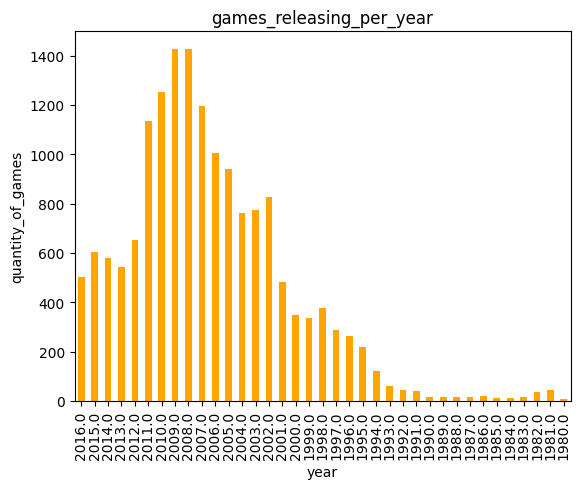

In [13]:
data_year = data.groupby('year_of_release')['name'].count().sort_index(ascending=False)
print(data_year)

data_year.plot(kind='bar',
               xlabel='year',
               ylabel='quantity_of_games',
               title='games_releasing_per_year',
               color='orange'
              )
plt.show()

Considero que los datos comienzan a ser representativos desde el año 2002, ya que es cuando la venta de juegos comienza a incrementar y a fluctuar más, teniendo su máximo en el 2008.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buena la observación! Efectivamente hay años donde los videojuegos empezaron a tomar fuerza por lo que habrán más datos ahí
</div>

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64
platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985.0             NaN    0.02    NaN     NaN     NaN     NaN     NaN    NaN   
1994.0             NaN     NaN    NaN    6.03     NaN     NaN     NaN    NaN   
1995.0             NaN     NaN    NaN   35.96     NaN     NaN     NaN    NaN   
1996.0             NaN     NaN    NaN   94.70     NaN     NaN     NaN    NaN   
1997.0             NaN     NaN    NaN  136.17     NaN     NaN     NaN    NaN   
1998.0             NaN     NaN    NaN  169.49     NaN     NaN     NaN    NaN   
1999.0             NaN     NaN    NaN  144.53     NaN     NaN     NaN    NaN   
2000.0             NaN     NaN   0.07   96.37   39.17     NaN     NaN    NaN 

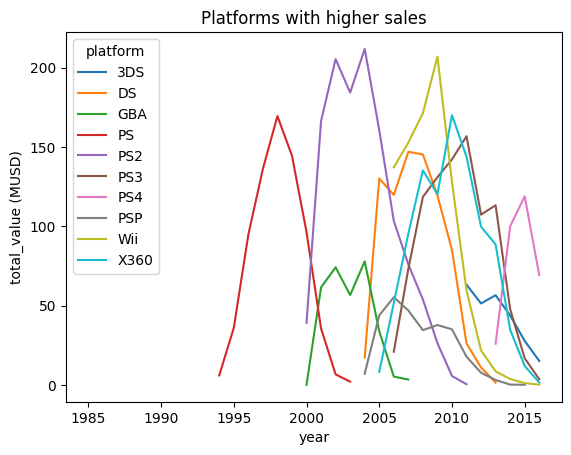

In [14]:
#representación de las plataformas con más ventas
data_higher_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
data_higher_sales_top_10 = data_higher_sales.head(10)
print(data_higher_sales_top_10)

data_higher_sales_year = data[data['platform'].isin(data_higher_sales_top_10.index)]

data_higher_sales_filtered = data_higher_sales_year.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
print(data_higher_sales_filtered)
data_higher_sales_filtered.plot(title='Platforms with higher sales',
                                kind='line',
                                xlabel='year',
                                ylabel='total_value (MUSD)'
                               )
plt.show()

En la representación anterior, se uso el método 'unstack()' con el fin de poder visualizar el comportamiento de cada una de las plataformas a lo largo del tiempo. Con la información resultante se puede inferir que entre el periodo del 2000 al 2010, es el que más ventas se realizaron de las diferentes plataformas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien analizada la gráfica! Efectivamente hay plataformas que tuvieron su momento de popularidad en ciertos años mientras otras fueron apareciendo y ganando más ventas
</div>

In [15]:
popular_platform = data_higher_sales_year.groupby('platform')['year_of_release'].max()
print(popular_platform)
no_sales_platforms_now = popular_platform[popular_platform < data['year_of_release'].max()]
print(f"las plataformas con mayores ventas que dejaron de ser populares de acuerdo con el último dato de año son: \n{no_sales_platforms_now}")

platform
3DS     2016.0
DS      2013.0
GBA     2007.0
PS      2003.0
PS2     2011.0
PS3     2016.0
PS4     2016.0
PSP     2015.0
Wii     2016.0
X360    2016.0
Name: year_of_release, dtype: float64
las plataformas con mayores ventas que dejaron de ser populares de acuerdo con el último dato de año son: 
platform
DS     2013.0
GBA    2007.0
PS     2003.0
PS2    2011.0
PSP    2015.0
Name: year_of_release, dtype: float64


In [16]:
platform_less_popular = data_higher_sales_year.groupby('platform')['year_of_release'].min()
print(platform_less_popular)

platform
3DS     2011.0
DS      1985.0
GBA     2000.0
PS      1994.0
PS2     2000.0
PS3     2006.0
PS4     2013.0
PSP     2004.0
Wii     2006.0
X360    2005.0
Name: year_of_release, dtype: float64


In [17]:
#tiempo de vida de las plataformas
platform_lifetime = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['platform_lifetime'] = platform_lifetime['max'] - platform_lifetime['min']
print(platform_lifetime)
top_platform_lifetime = platform_lifetime.loc[data_higher_sales_top_10.index]
print(top_platform_lifetime)
platform_average_lifetime = top_platform_lifetime['platform_lifetime'].mean()
print(f"Tiempo promedio de vida de las plataformas es: {platform_average_lifetime} años")

             min     max  platform_lifetime
platform                                   
2600      1980.0  1989.0                9.0
3DO       1994.0  1995.0                1.0
3DS       2011.0  2016.0                5.0
DC        1998.0  2008.0               10.0
DS        1985.0  2013.0               28.0
GB        1988.0  2001.0               13.0
GBA       2000.0  2007.0                7.0
GC        2001.0  2007.0                6.0
GEN       1990.0  1994.0                4.0
GG        1992.0  1992.0                0.0
N64       1996.0  2002.0                6.0
NES       1983.0  1994.0               11.0
NG        1993.0  1996.0                3.0
PC        1985.0  2016.0               31.0
PCFX      1996.0  1996.0                0.0
PS        1994.0  2003.0                9.0
PS2       2000.0  2011.0               11.0
PS3       2006.0  2016.0               10.0
PS4       2013.0  2016.0                3.0
PSP       2004.0  2015.0               11.0
PSV       2011.0  2016.0        

In [18]:
#determinar los datos representativos apra 2017
data_year_min = data['year_of_release'].min()
print(f"el valor mínimo en la columna 'year_of_release es: {data_year_min}")
data_year_max = data['year_of_release'].max()
print(f"el valor máximo en la columna 'year_of_release es: {data_year_max}")

el valor mínimo en la columna 'year_of_release es: 1980.0
el valor máximo en la columna 'year_of_release es: 2016.0


Por lo anterior y teniendo en cuenta el desarrollo realizado hasta el momento los datos que considero representativo para el proyecto y en el caso de generar un modelo 2017 son desde el año 2007 hasta el 2016, ya que tendría un muestro realmente significativo de los últimos 10 años. Coincidencialmente y teniendo presente el desarrollo del trabjo, dentro de ese periodo es cuando más se generaron ventas.

In [19]:
#segmentación de datos representativos
data = data[data['year_of_release'] >= 2007]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [20]:
#Cálculo de plataformas con mayores ventas
data_platform_higher_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
data_platform_higher_sales

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: total_sales, dtype: float64

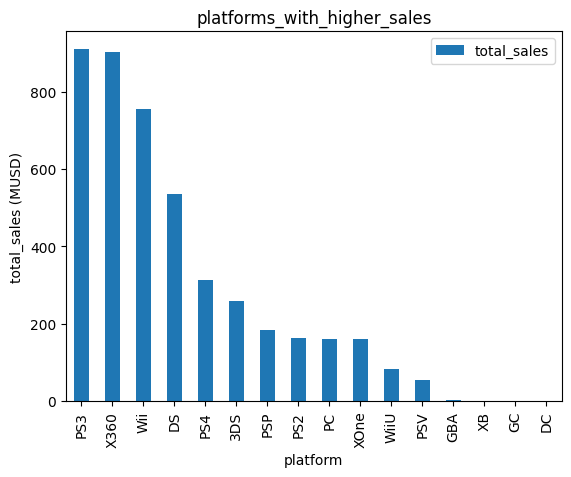

In [21]:
data_frame_plat = data_platform_higher_sales.reset_index()

data_frame_plat.plot(kind='bar',
                     x='platform',
                     title='platforms_with_higher_sales',
                     ylabel='total_sales (MUSD)'
                    )
plt.show()

Las plataformas líderes en ventas son 'PS3' y 'X360' ya que a lo largo del tiempo son las que más ventas han generado, por otra parte las plataformas que según los ejercicio ejecutados son más rentables, son las de 'PS3', 'X360', 'PS4' y 'XOne', ya que por su parte las 2 primeras son las que más ganancias han generado y han tenido un periodo de aceptación de apróximadamente 10 años, lo cual podría indicarnos que sus predecesoras podrían llegar a tener un nivel de aceptación similar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hechos los cálculos y las visualizaciones hasta este punto, bastante claras!
</div>

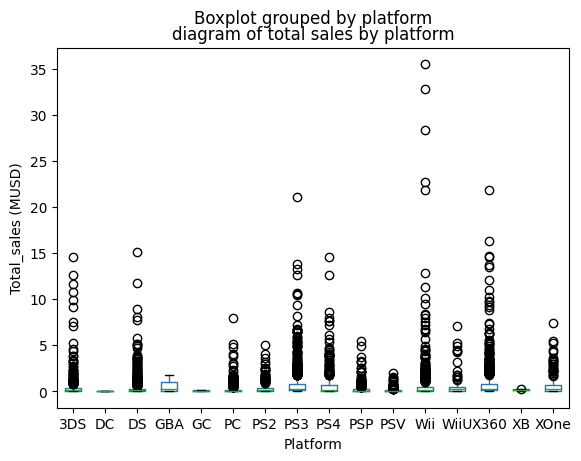

In [22]:
#diagráma
data[['platform', 'total_sales']]
data.boxplot(
    column='total_sales', 
    by='platform', 
    grid=False,
)
plt.title('diagram of total sales by platform')
plt.xlabel('Platform')
plt.ylabel('Total_sales (MUSD)')
plt.show()

In [23]:
#cálculo de las ventas promedio por plataforma
average_total_sales = data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
average_total_sales

platform
X360    0.804077
PS4     0.801378
PS3     0.711790
XOne    0.645020
Wii     0.607110
GBA     0.566667
WiiU    0.559116
3DS     0.503535
DS      0.301204
PS2     0.297399
PC      0.221782
PSP     0.205045
XB      0.182500
PSV     0.125431
GC      0.067500
DC      0.030000
Name: total_sales, dtype: float64

Sumado a la conclusión anterior, los promedios más altos ratifican que las plataformas más rentables son 'X360', 'PS4', 'PS3' y 'XOne'.

In [24]:
# elección de plataforma
data_PS4 = data[data['platform'] == 'PS4']
data_PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


                                   name  critic_score  user_score  total_sales
0                  inFAMOUS: Second Son          80.0         7.9         2.79
1                   Zombie Army Trilogy          62.0         6.8         0.20
2                                XCOM 2          88.0         8.0         0.14
3                            Worms: WMD          78.0         7.6         0.03
4                World of Final Fantasy          77.0         8.3         0.34
..                                  ...           ...         ...          ...
244               Angry Birds Star Wars          47.0         2.0         0.22
245                    Alien: Isolation          79.0         8.1         1.12
246   Agatha Christie's The ABC Murders          67.0         6.2         0.02
247  Aegis of Earth: Protonovus Assault          57.0         7.8         0.02
248                       7 Days to Die          45.0         5.9         0.14

[249 rows x 4 columns]


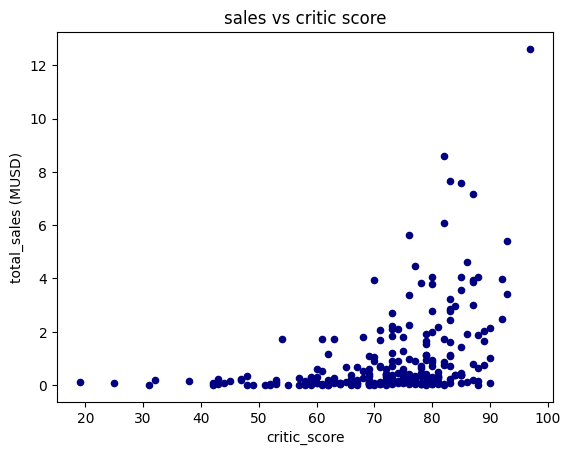

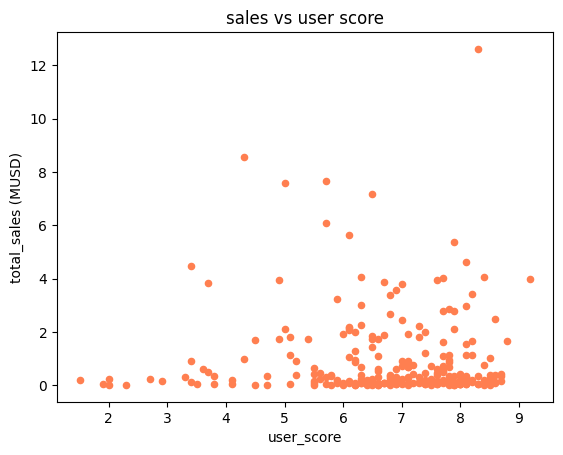

In [25]:
# Agrupar los puntajes de usuario y de la critica con las ventas totales.
data_PS4_score = data_PS4.groupby(['name', 'critic_score', 'user_score'])['total_sales'].sum().sort_index(ascending=False).reset_index()
print(data_PS4_score)
data_PS4_score.plot(kind='scatter',
                    y='total_sales',
                    x='critic_score',
                    title='sales vs critic score',
                    ylabel='total_sales (MUSD)',
                    color='navy'
                   )
plt.show()
data_PS4_score.plot(kind='scatter',
                    y='total_sales',
                    x='user_score',
                    title='sales vs user score',
                    ylabel='total_sales (MUSD)',
                    color='coral'
                   )
plt.show()

In [26]:
# generación de la correlación entre los puntajes de criticos y usuarios con respecto a las ventas totales
data_PS4_corr = data_PS4_score[['critic_score', 'user_score', 'total_sales']].corr()
data_PS4_corr

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Analizando los resultados anteriores se puede deducir lo siguiente:

- critic_score: tiene una correlación positiva con respecto a las ventas totales ('total_sales').
- user_score: tiene una correlación minimamente negativa con relación a las ventas totales ('total_sales').

Por lo anterior, se puede concluir que el puntaje que los críticos otorguen a un video juego se ve impactado en las ventas que tenga este, mucho más que por el puntaje que los usuarios de la plataforma den.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Generalmente las críticas afectan mucho las ventas de videojuegos, analizaste muy bien las gráficas
</div>

In [27]:
# comparativo de los mismos juegos de PS4 con otras plataformas}

comparisson_games_list = ['Zombie Army Trilogy', 'XCOM 2', 'Worms: WMD', 'World of Final Fantasy']

comparisson_games = data[data['name'].isin(comparisson_games_list)]

comparisson_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5439,World of Final Fantasy,PS4,2016.0,Role-Playing,0.08,0.14,0.08,0.04,77.0,8.3,E10+,0.34
6995,XCOM 2,PC,2016.0,Strategy,0.09,0.12,0.00,0.02,88.0,7.1,T,0.23
7401,World of Final Fantasy,PSV,2016.0,Role-Playing,0.04,0.06,0.08,0.03,77.0,8.6,E10+,0.21
7539,Zombie Army Trilogy,PS4,2015.0,Shooter,0.05,0.12,0.00,0.03,62.0,6.8,NaN,0.20
9117,XCOM 2,PS4,2016.0,Strategy,0.04,0.08,0.00,0.02,88.0,8.0,T,0.14
10316,Zombie Army Trilogy,XOne,2015.0,Shooter,0.05,0.05,0.00,0.01,62.0,7.2,NaN,0.11
13413,XCOM 2,XOne,2016.0,Strategy,0.02,0.02,0.00,0.00,87.0,8.1,T,0.04
14509,Worms: WMD,PS4,2016.0,Action,0.01,0.02,0.00,0.00,78.0,7.6,E10+,0.03
16264,Worms: WMD,XOne,2016.0,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01


                     name platform  critic_score  user_score  total_sales
0  World of Final Fantasy      PS4          77.0         8.3         0.34
1                  XCOM 2       PC          88.0         7.1         0.23
2  World of Final Fantasy      PSV          77.0         8.6         0.21
3     Zombie Army Trilogy      PS4          62.0         6.8         0.20
4                  XCOM 2      PS4          88.0         8.0         0.14
5     Zombie Army Trilogy     XOne          62.0         7.2         0.11
6                  XCOM 2     XOne          87.0         8.1         0.04
7              Worms: WMD      PS4          78.0         7.6         0.03
8              Worms: WMD     XOne          75.0         8.1         0.01


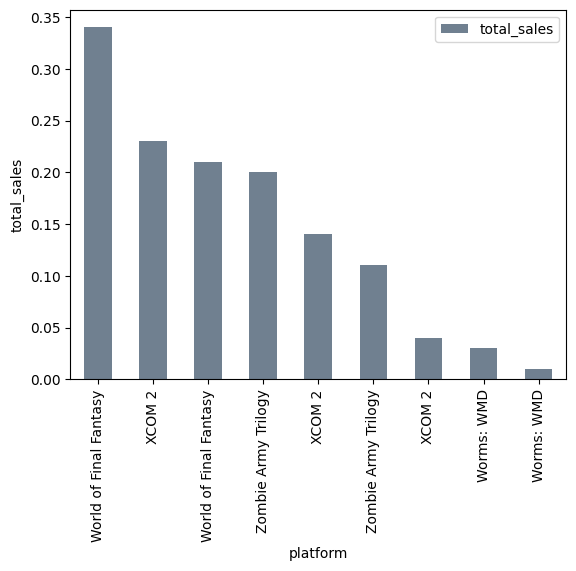

In [28]:
comparisson_games_sales = comparisson_games.groupby(['name', 'platform', 'critic_score', 'user_score'])['total_sales'].sum().sort_values(ascending=False).reset_index()
print(comparisson_games_sales)

comparisson_games_sales.plot(kind='bar',
                             x='name',
                             y='total_sales',
                             xlabel='platform',
                             ylabel='total_sales',
                             color='slategray'
                            )
plt.show()

Se tomó como referencia los 4 juegos más vendidos en la plataforma PS4 (se excluyo el juego más vendido de la plataforma _'inFAMOUS: Second Son'_ ya que solo existe en PS4), se puede evidenciar que las ventas son muy similares y competitivas entre el mismo juego en diferente plataforma.

           genre  total_sales
0         Action      1050.59
1        Shooter       678.80
2         Sports       658.07
3           Misc       487.89
4   Role-Playing       465.03
5         Racing       265.19
6       Platform       230.45
7     Simulation       199.13
8       Fighting       166.00
9      Adventure       129.99
10        Puzzle        79.18
11      Strategy        68.99


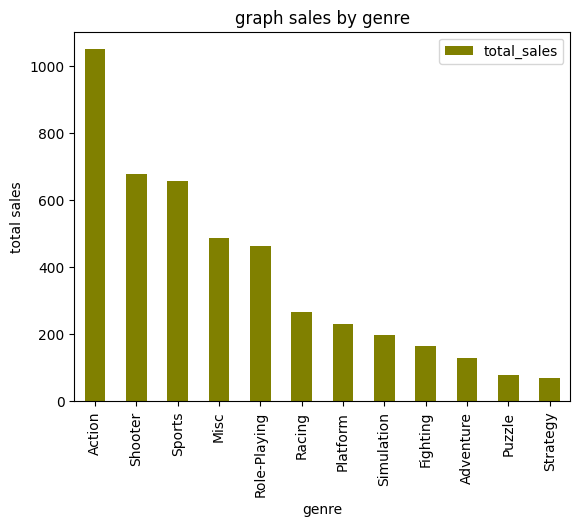

In [29]:
# análisis de juegos por género con respecto a las ventas
data_genre = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
print(data_genre)

data_genre.plot(kind='bar',
                title='graph sales by genre',
                x='genre',
                y='total_sales',
                xlabel='genre',
                ylabel='total sales',
                color='olive'
               )
plt.show()

Los géneros con más ventas son los de acción, shooter y sports, no obstante, acción es el género de juegos que supera las ventas con respecto a los otros significativamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Se nota que géneros tienen gran parte del mercado, buen trabajo con la gráfica!
</div>

# 4. Perfil de usuario para cada región

In [30]:
# plataformas por región
## na_sales
data_platform_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las 5 plataformas con más ventas en Norteamérica son:\n{data_platform_na}\n")

## eu_sales
data_platform_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las 5 plataformas con más ventas en Europa son:\n{data_platform_eu}\n")

## jp_sales
data_platform_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las 5 plataformas con más ventas en Japón son:\n{data_platform_jp}\n")

## other_sales
data_platform_other = data.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las 5 plataformas con más ventas en otros países son:\n{data_platform_other}\n")

Las 5 plataformas con más ventas en Norteamérica son:
platform
X360    553.68
Wii     416.01
PS3     381.29
DS      273.98
PS4     108.74
Name: na_sales, dtype: float64

Las 5 plataformas con más ventas en Europa son:
platform
PS3     319.83
X360    257.05
Wii     214.70
PS4     141.09
DS      119.92
Name: eu_sales, dtype: float64

Las 5 plataformas con más ventas en Japón son:
platform
DS     102.93
3DS    100.62
PS3     78.33
PSP     66.24
Wii     59.13
Name: jp_sales, dtype: float64

Las 5 plataformas con más ventas en otros países son:
platform
PS3     130.93
X360     79.82
Wii      64.19
PS2      54.46
PS4      48.35
Name: other_sales, dtype: float64



In [31]:
# cálculo de las cuotas de mercado
total_na_sales = data['na_sales'].sum()
total_eu_sales = data['eu_sales'].sum()
total_jp_sales = data['jp_sales'].sum()
total_other_sales = data['other_sales'].sum()

platform_na = data_platform_na / total_na_sales * 100
platform_eu = data_platform_eu / total_eu_sales * 100
platform_jp = data_platform_jp / total_jp_sales * 100
platform_other = data_platform_other / total_other_sales * 100

print(f"El porcentaje de mercado que representa las 5 plataformas con más ventas en NA:\n {platform_na}\n")
print(f"El porcentaje de mercado que representa las 5 plataformas con más ventas en EU:\n {platform_eu}\n")
print(f"El porcentaje de mercado que representa las 5 plataformas con más ventas en JP:\n {platform_jp}\n")
print(f"El porcentaje de mercado que representa las 5 plataformas con más ventas en other:\n {platform_other}")

El porcentaje de mercado que representa las 5 plataformas con más ventas en NA:
 platform
X360    26.061171
Wii     19.581180
PS3     17.946944
DS      12.895968
PS4      5.118284
Name: na_sales, dtype: float64

El porcentaje de mercado que representa las 5 plataformas con más ventas en EU:
 platform
PS3     23.377506
X360    18.788694
Wii     15.693183
PS4     10.312767
DS       8.765377
Name: eu_sales, dtype: float64

El porcentaje de mercado que representa las 5 plataformas con más ventas en JP:
 platform
DS     21.110815
3DS    20.637037
PS3    16.065385
PSP    13.585742
Wii    12.127489
Name: jp_sales, dtype: float64

El porcentaje de mercado que representa las 5 plataformas con más ventas en other:
 platform
PS3     26.233745
X360    15.993107
Wii     12.861408
PS2     10.911860
PS4      9.687631
Name: other_sales, dtype: float64


La variación de las plataformas más populares en cada región no presenta una tendencia, ya que para cada región varia la popularidad de las plataformas y por consiguiente las ventas que esta genera.

In [32]:
# 5 géneros por región
## genre na_sales
data_genre_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros con más ventas en Norteamérica son:\n{data_genre_na}\n")

## genre eu_sales
data_genre_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros con más ventas en Europa son:\n{data_genre_eu}\n")

## genre jp_sales
data_genre_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros con más ventas en Japón son:\n{data_genre_jp}\n")

## genre other_sales
data_genre_other = data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros con más ventas en otros países son:\n{data_genre_other}\n")

Los 5 géneros con más ventas en Norteamérica son:
genre
Action          492.17
Shooter         350.11
Sports          323.86
Misc            259.16
Role-Playing    175.41
Name: na_sales, dtype: float64

Los 5 géneros con más ventas en Europa son:
genre
Action     335.67
Shooter    230.16
Sports     211.49
Misc       127.62
Racing     104.63
Name: eu_sales, dtype: float64

Los 5 géneros con más ventas en Japón son:
genre
Role-Playing    150.55
Action           96.29
Misc             48.79
Sports           40.28
Adventure        26.91
Name: jp_sales, dtype: float64

Los 5 géneros con más ventas en otros países son:
genre
Action          126.46
Sports           82.44
Shooter          81.07
Misc             52.32
Role-Playing     36.40
Name: other_sales, dtype: float64



Bajo este escenario los resultados si muestran una tendencia muy marcada de los géneros de juegos más populares, teniendo solamente un comportamiento diferenciado en japón, sin embargo 'action' es el género popular en todas las áreas.

In [33]:
# afectación rating (ESRB) en ventas de regiones individuales
## rating na_sales
data_rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas en Norteamérica según la clasificación son:\n{data_rating_na}\n")

## rating eu_sales
data_rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas en Europa según la clasificación son:\n{data_rating_eu}\n")

## rating jp_sales
data_rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas en Japon según la clasificación son:\n{data_rating_jp}\n")

## rating other_sales
data_rating_other = data.groupby('rating')['other_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas en otros países según la clasificación son:\n{data_rating_other}\n")

Las ventas en Norteamérica según la clasificación son:
rating
E       663.99
M       546.55
T       371.32
E10+    287.61
EC        1.32
Name: na_sales, dtype: float64

Las ventas en Europa según la clasificación son:
rating
E       393.08
M       385.86
T       217.89
E10+    162.75
RP        0.03
Name: eu_sales, dtype: float64

Las ventas en Japon según la clasificación son:
rating
E       95.06
T       74.74
M       41.09
E10+    31.91
EC       0.00
Name: jp_sales, dtype: float64

Las ventas en otros países según la clasificación son:
rating
E       138.48
M       134.30
T        94.12
E10+     61.97
EC        0.08
Name: other_sales, dtype: float64



La ventas de acuerdo a la clasificación de los juegos no se ve afectada en las regiones solas a diferencia de las ventas en el grupo de los otros paises, como se evidencia en el resultado, la mayores ventas en todas las regiones se encuentran en la clasificación _E_.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo al analizar los datos para cada región, este detalle aporta bastante a ver donde una empresa podría aplicar sus recursos cuando se trate de videojuegos, este es el poder de los datos buen trabajo!
</div>

# 5. Prueba de las hipótesis

#### Calificaciones de usuarios para XOne vs PC
**Hipótesis nula**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.  

**Hipótesis alternativa**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [34]:
user_score_xone = data.loc[data['platform'] == 'XOne', 'user_score'].dropna()

user_score_pc = data.loc[data['platform'] == 'PC', 'user_score'].dropna()

# el valor de nivel de significancia es de 5%
alpha = 0.05

# Hipótesis
result_platform = st.ttest_ind(
    user_score_xone,
    user_score_pc,
    equal_var = False
)

print('valor p: ', result_platform.pvalue)

# verificación del resultado
if result_platform.pvalue < alpha:
    print("Rechazo la hipótesis nula. Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.\n")
else:
    print("No rechazo la hipótesis nula. No hay evidencia suficiente para decir que las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.\n")


valor p:  0.04401892858926167
Rechazo la hipótesis nula. Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.



#### Calificaciones de usuarios para Acción vs Deportes
**Hipótesis nula**: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.  

**Hipótesis alternativa**: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

In [35]:
user_score_action = data[data['genre'] == 'Action']['user_score'].dropna()

user_score_sports = data[data['genre'] == 'Sports']['user_score'].dropna()

# el valor de nivel de significancia es de 5%
alpha = 0.05

# Hipótesis
result_genre = st.ttest_ind(
    user_score_action,
    user_score_sports,
    equal_var = False
)

print('valor p: ', result_genre.pvalue)

# verificación del resultado
if result_genre.pvalue < alpha:
    print("Rechazo la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.\n")
else:
    print("No rechazo la hipótesis nula. No hay evidencia suficiente para decir que las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.\n")

valor p:  4.540665510055229e-11
Rechazo la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros Action y Sports son diferentes.



Se quería verificar si las calificaciones promedio de los usuarios eran significativamente diferentes entre dos plataformas y dos géneros de juegos. El Test escogido es el indicado ya que para este tipo de análisis se trabaja con datos independientes.

Ni en el caso de los géneros (_action & sports_), ni para las plataformas (_XOne & PC_), la muestra de datos depende una de la otra, por tal motivo se consideran independientes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicadas las pruebas de hipótesis, demostraste claramente los resultados en base a los datos!
</div>

# 6 -  Conclusión

En el análisis realizado se han interpretado y examinado diferentes aspectos para una muestra de datos de ventas de videojuegos, teniendo en cuenta las plataformas, los géneros, las regiones, las calificaciones de usuarios y criticos. 

En el desarrollo se realizó un preparación, procesamiento y análisis de los datos, con el fin de identificar patrones de comportamiento en el caso de estudio. 

### Caso regiones:
- Principalmente se identificó que para las regiones de **Norteamérica, Europa y Resto de Países** las plataformas más populares y preponderantes son _Xbox, Playstation & Wii_.

- Por su parte para **Japón** las plataformas más populares e influyentes son _Nintendo & Playstation_

Debido a que el uso y preferencia de las plataformas varia dependiendo la región, se podría entrar a estudiar el mercado partiendo de los análisis realizado y así conocer el mercado objetivo.

### Caso géneros:
- Principalmente se identificó que para las regiones de **Norteamérica, Europa y Resto de Países** los géneros más populares y preponderantes son _Action, Shooter & Sports_.

- Por su parte para **Japón** los géneros más populares e influyentes son _Role playing, Misc & Action_

De acuerdo con el análisis se tendría que revisar la categoria de los juegos que se quieren vender en cada región.

Adicionalmente, se pudo identificar que las ventas de los videojuegos se ven afectadas por las calificaciones que los criticos otorguen a estos, caso contrario con la calificación que dan los usuarios.

Finalmente, el favoritismo de cada usuario por la plataforma y género varia según la región que se encuentre. 

<div class="alert alert-block alert-warning">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo Carlos! Resolviste muy bien cada uno de los ejercicios llegando a conclusiones muy claras para cada caso.
    
Cómo recomendación te dejaría que utilices más los títulos en Markdown para que cada sección o ejercicio sea más claro donde empieza y donde termina, por el resto lo hiciste super bien.
    
Saludos!
</div>